In [18]:
import pandas as pd
from sklearn import tree


In [8]:
pip install sklearn


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 2.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 3.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 2.1 MB/s eta 0:00:00m eta 0:00:010:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=884d9ac4e36a4add2c9be9832ec11a02e8766c937853533863f2a6c643cb2f82
  Stored in directory: /home/exam/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendo

In [20]:
zoo_dataset=pd.read_csv("zoo.csv")

In [21]:
zoo_dataset.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [36]:
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [37]:
features = list(zoo_dataset.columns)
print(features)

['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']


In [39]:
features.remove('class_type')
features.remove('animal_name')

print(features)


['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']


In [40]:
X = zoo_dataset[features].values.astype(np.float32)
Y = zoo_dataset.class_type


print(X.shape)
print(Y.shape)


(101, 16)
(101,)


In [41]:


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(80, 16)
(80,)
(21, 16)
(21,)


In [46]:
Y_pred = model.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))


[[7 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [60]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
print("training accuracy :", model.score(X_train, Y_train))
print("testing accuracy :", model.score(X_test, Y_test))


training accuracy : 1.0
testing accuracy : 1.0


[Text(0.8181818181818182, 0.9375, 'X[3] <= 0.5\ngini = 0.748\nsamples = 80\nvalue = [34, 16, 5, 8, 3, 6, 8]'),
 Text(0.7272727272727273, 0.8125, 'X[1] <= 0.5\ngini = 0.785\nsamples = 46\nvalue = [0, 16, 5, 8, 3, 6, 8]'),
 Text(0.6363636363636364, 0.6875, 'X[11] <= 0.5\ngini = 0.78\nsamples = 30\nvalue = [0, 0, 5, 8, 3, 6, 8]'),
 Text(0.5454545454545454, 0.5625, 'X[8] <= 0.5\ngini = 0.723\nsamples = 22\nvalue = [0, 0, 5, 0, 3, 6, 8]'),
 Text(0.36363636363636365, 0.4375, 'X[4] <= 0.5\ngini = 0.49\nsamples = 14\nvalue = [0, 0, 0, 0, 0, 6, 8]'),
 Text(0.2727272727272727, 0.3125, 'X[6] <= 0.5\ngini = 0.198\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 1, 8]'),
 Text(0.18181818181818182, 0.1875, 'X[12] <= 3.0\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 0, 0, 0, 1, 2]'),
 Text(0.09090909090909091, 0.0625, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 2]'),
 Text(0.2727272727272727, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 1, 0]'),
 Text(0.36363636363636365, 0.1875, 'gini = 0.0\

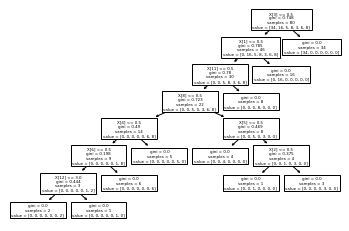

In [61]:
tree.plot_tree(model)

In [63]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 270.5 kB/s eta 0:00:0031m1.6 MB/s eta 0:00:01
--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-pa

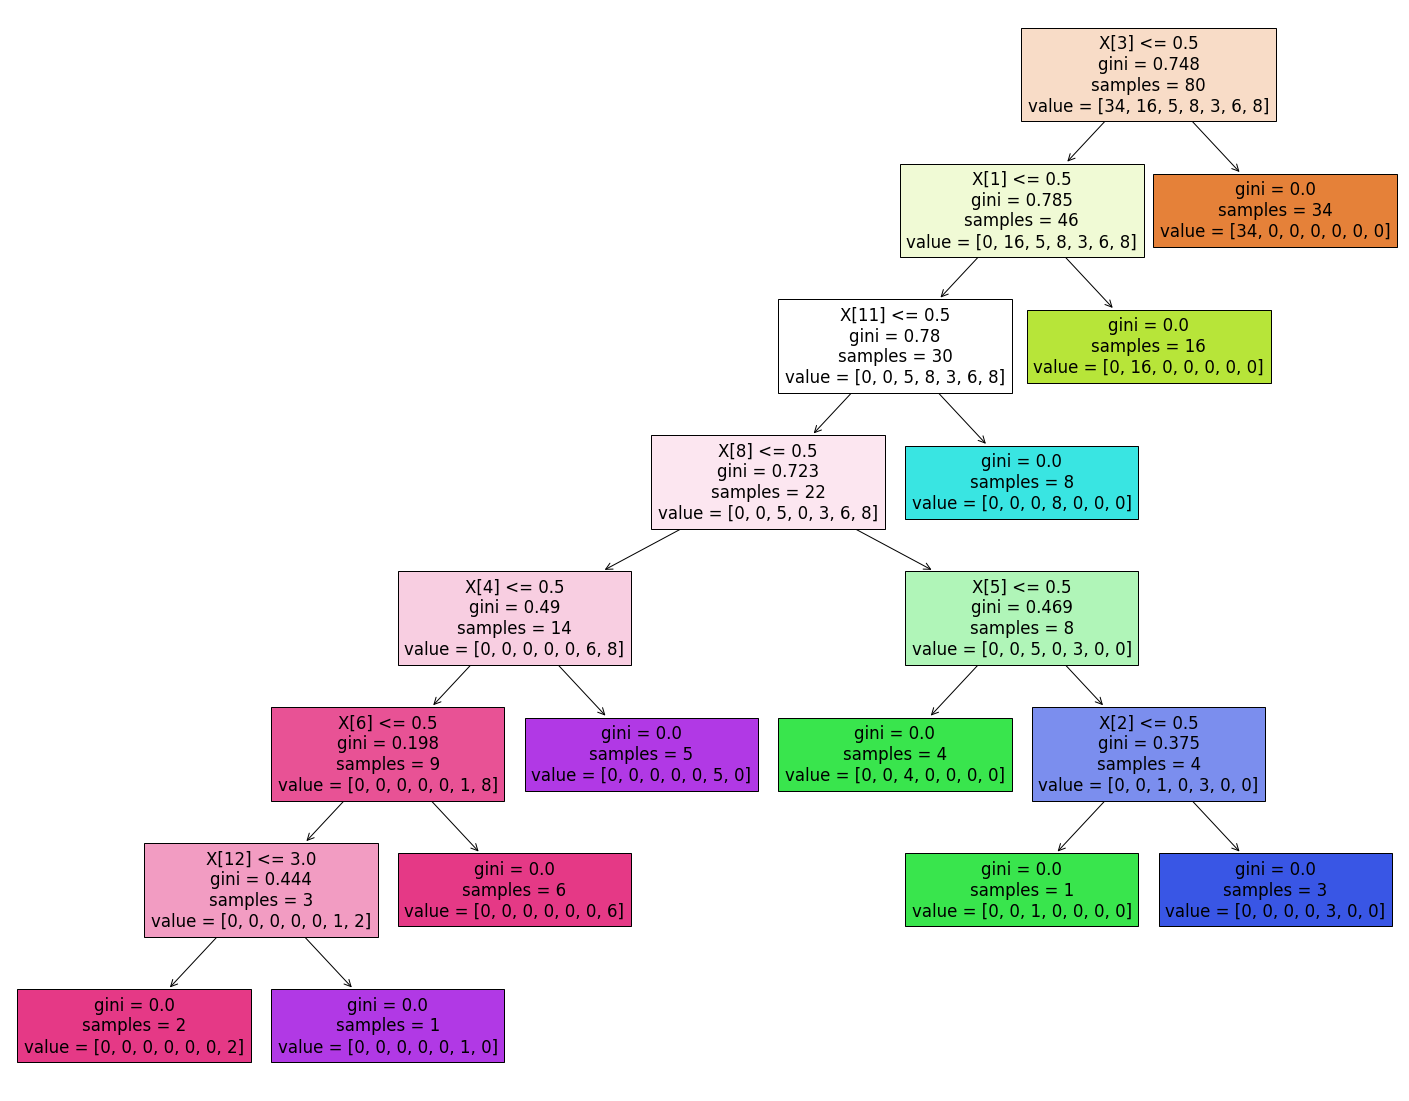

In [93]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   filled=True)